In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from insightface.app import FaceAnalysis
from numpy.linalg import norm

In [9]:
# Initialize RetinaFace model
app = FaceAnalysis(name="buffalo_l", providers=['CPUExecutionProvider'])  
app.prepare(ctx_id=0, det_size=(640, 640))  # Adjust det_size for better accuracy

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [16]:
known_faces = {}  # Dictionary to store embeddings with names
dataset_path = "Dataset/"  # Path to dataset folder

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = app.get(img)  # Detect face
    if len(faces) > 0:
        embedding = faces[0].normed_embedding  # Get face embedding
        name = os.path.splitext(filename)[0]  # Extract name from filename
        known_faces[name] = embedding

print(f"Loaded {len(known_faces)} known faces.")


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [11]:
image_path = "classroom.jpg"  # Path to classroom image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces = app.get(img)  # Detect faces
print(f"Total Faces Detected: {len(faces)}")


Total Faces Detected: 12


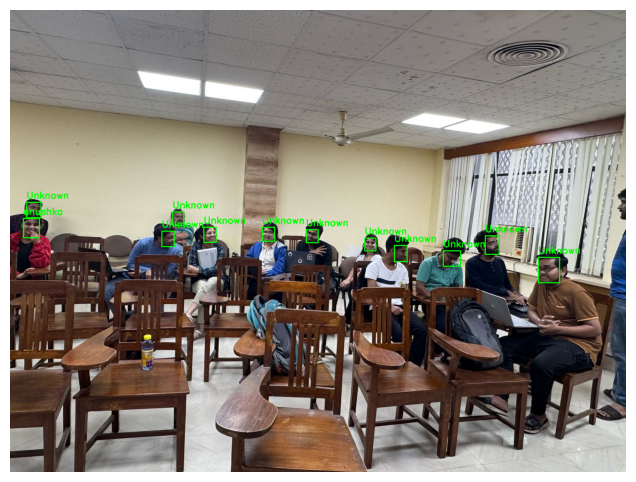

In [13]:
def cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (norm(embedding1) * norm(embedding2))

threshold = 0.3  # Adjust threshold for accuracy

for face in faces:
    x1, y1, x2, y2 = face.bbox.astype(int)  # Get bounding box
    embedding = face.normed_embedding  # Get face embedding

    best_match = "Unknown"
    best_score = 0

    for name, known_embedding in known_faces.items():
        score = cosine_similarity(embedding, known_embedding)
        if score > best_score and score > threshold:
            best_match = name
            best_score = score

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display name above the detected face
    text_x, text_y = x1, y1 - 10  # Position the text above the bounding box
    cv2.putText(img, best_match, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Show the image with detected faces and names
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [17]:
import os
import cv2

dataset_path = "dataset/"  # Ensure this folder exists

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)

    # Check if file exists
    if not os.path.exists(img_path):
        print(f"❌ File not found: {img_path}")
        continue  # Skip this file

    # Load image
    img = cv2.imread(img_path)

    # Check if image loaded properly
    if img is None:
        print(f"❌ Failed to load: {img_path}")
        continue  # Skip this file

    print(f"✅ Successfully loaded: {img_path}")

    # Convert to RGB (only if the image is valid)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


❌ Failed to load: dataset/.ipynb_checkpoints
❌ Failed to load: dataset/Dataset


In [18]:
import os
import cv2

dataset_path = "dataset/"
valid_extensions = (".jpg", ".jpeg", ".png")  # Allowed formats

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)

    # Skip directories
    if os.path.isdir(img_path):
        print(f"Skipping folder: {img_path}")
        continue

    # Skip non-image files
    if not filename.lower().endswith(valid_extensions):
        print(f"Skipping non-image file: {filename}")
        continue

    # Load image
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Failed to load: {img_path}")
        continue  # Skip corrupted or unreadable images

    print(f"✅ Successfully loaded: {img_path}")

    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


Skipping folder: dataset/.ipynb_checkpoints
Skipping folder: dataset/Dataset


In [19]:
import os
import cv2

dataset_path = "dataset/"
valid_extensions = (".jpg", ".jpeg", ".png")

for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)

    # Skip system files
    if not os.path.isdir(person_path):
        continue  # Skip files like .ipynb_checkpoints

    print(f"📂 Processing: {person}")

    for filename in os.listdir(person_path):
        img_path = os.path.join(person_path, filename)

        # Skip non-image files
        if not filename.lower().endswith(valid_extensions):
            print(f"Skipping non-image file: {filename}")
            continue

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            print(f"❌ Failed to load: {img_path}")
            continue  # Skip corrupt images

        print(f"✅ Loaded: {img_path}")

        # Convert to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


📂 Processing: .ipynb_checkpoints
✅ Loaded: dataset/.ipynb_checkpoints\anushka-checkpoint.jpg
📂 Processing: Dataset
Skipping non-image file: .ipynb_checkpoints
Skipping non-image file: anushka
Skipping non-image file: Prajwal
Skipping non-image file: Uttam Kumar


In [20]:
# Initialize RetinaFace model
app = FaceAnalysis(name="buffalo_l", providers=['CPUExecutionProvider'])  
app.prepare(ctx_id=0, det_size=(640, 640))  # Adjust det_size for better accuracy


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [21]:
known_faces = {}  # Dictionary to store embeddings with names
dataset_path = "dataset/"  # Path to dataset folder

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = app.get(img)  # Detect face
    if len(faces) > 0:
        embedding = faces[0].normed_embedding  # Get face embedding
        name = os.path.splitext(filename)[0]  # Extract name from filename
        known_faces[name] = embedding

print(f"Loaded {len(known_faces)} known faces.")


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [24]:
import os
import cv2

known_faces = {}  # Dictionary to store embeddings with names
dataset_path = "dataset/"  # Path to dataset folder

for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)

    # Skip system files or non-folder items
    if not os.path.isdir(person_path):
        continue  

    print(f"📂 Processing: {person}")

    for filename in os.listdir(person_path):
        img_path = os.path.join(person_path, filename)

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            print(f"❌ Failed to load: {img_path}")
            continue  # Skip corrupt images

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        faces = app.get(img)  # Detect face
        if len(faces) > 0:
            embedding = faces[0].normed_embedding  # Get face embedding
            known_faces[person] = embedding  # Use folder name as person's name

    print(f"✅ {person} added to dataset.")

print(f"Loaded {len(known_faces)} known faces.")


📂 Processing: .ipynb_checkpoints
✅ .ipynb_checkpoints added to dataset.
📂 Processing: Dataset
❌ Failed to load: dataset/Dataset\anushka
❌ Failed to load: dataset/Dataset\Prajwal Meshram
❌ Failed to load: dataset/Dataset\Uttam Kumar
✅ Dataset added to dataset.
Loaded 1 known faces.


In [25]:
import os
import cv2

known_faces = {}  # Dictionary to store embeddings with names
dataset_path = "dataset/"  # Path to dataset folder

for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)

    # Skip system files or non-folder items
    if not os.path.isdir(person_path):
        continue  

    print(f"📂 Processing: {person}")

    for filename in os.listdir(person_path):
        img_path = os.path.join(person_path, filename)

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            print(f"❌ Failed to load: {img_path}")
            continue  # Skip corrupt images

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        faces = app.get(img)  # Detect face
        if len(faces) > 0:
            embedding = faces[0].normed_embedding  # Get face embedding
            known_faces[person] = embedding  # Use folder name as person's name

    print(f"✅ {person} added to dataset.")

print(f"Loaded {len(known_faces)} known faces.")


📂 Processing: anushka
✅ anushka added to dataset.
📂 Processing: Prajwal Meshram
✅ Prajwal Meshram added to dataset.
📂 Processing: Uttam Kumar
✅ Uttam Kumar added to dataset.
Loaded 3 known faces.


In [26]:
image_path = "classroom.jpg"  # Path to classroom image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces = app.get(img)  # Detect faces
print(f"Total Faces Detected: {len(faces)}")


Total Faces Detected: 12


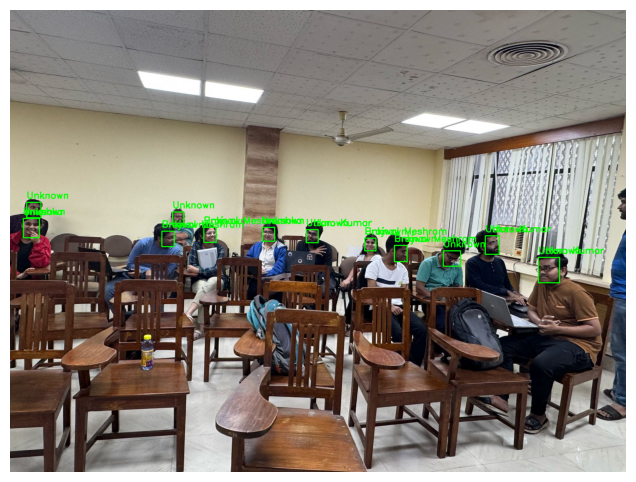

In [39]:
def cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (norm(embedding1) * norm(embedding2))

threshold = 0.2  # Adjust threshold for accuracy

for face in faces:
    x1, y1, x2, y2 = face.bbox.astype(int)  # Get bounding box
    embedding = face.normed_embedding  # Get face embedding

    best_match = "Unknown"
    best_score = 0

    for name, known_embedding in known_faces.items():
        score = cosine_similarity(embedding, known_embedding)
        if score > best_score and score > threshold:
            best_match = name
            best_score = score

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display name above the detected face
    text_x, text_y = x1, y1 - 10  # Position the text above the bounding box
    cv2.putText(img, best_match, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Show the image with detected faces and names
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.show()


In [40]:
import os
import cv2
import numpy as np
from insightface.app import FaceAnalysis

# Load the face detection and recognition model
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))  # Adjust for GPU/CPU

# Load known faces from dataset
known_faces = {}  
dataset_path = "dataset/Dataset/"  # Adjust path if needed

if not os.path.exists(dataset_path):
    print("❌ Dataset folder not found!")
    exit()

# Read images from subfolders
for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)

    if not os.path.isdir(person_path) or person.startswith('.'):
        continue  

    for filename in os.listdir(person_path):
        img_path = os.path.join(person_path, filename)

        if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = app.get(img_rgb)  # Detect face

        if len(faces) > 0:
            embedding = faces[0].normed_embedding
            known_faces[person] = embedding  # Store face embedding

print(f"✅ Loaded {len(known_faces)} known faces.")

# Function to recognize a face
def recognize_face(face_embedding, known_faces, threshold=0.6):
    min_distance = float("inf")
    best_match = "Unknown"

    for name, known_embedding in known_faces.items():
        distance = np.linalg.norm(face_embedding - known_embedding)

        if distance < threshold and distance < min_distance:
            min_distance = distance
            best_match = name  # Assign best match

    return best_match

# Load classroom image
classroom_img = cv2.imread("classroom.jpg")  # Replace with actual path
if classroom_img is None:
    print("❌ Failed to load classroom image!")
    exit()

classroom_img_rgb = cv2.cvtColor(classroom_img, cv2.COLOR_BGR2RGB)
faces = app.get(classroom_img_rgb)  # Detect faces in the classroom image

for face in faces:
    x1, y1, x2, y2 = map(int, face.bbox)  # Get bounding box
    embedding = face.normed_embedding  # Get face embedding

    # Recognize the face
    name = recognize_face(embedding, known_faces)

    # Draw bounding box & label
    cv2.rectangle(classroom_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(classroom_img, name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Save or display result
cv2.imshow("Recognized Faces", classroom_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\70472\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset/Dataset/'

In [1]:
import numpy as np
import cv2

threshold = 0.6  # Adjust threshold if needed

def recognize_face(face_embedding, known_faces):
    min_distance = float("inf")
    best_match = "Unknown"

    for name, known_embedding in known_faces.items():
        distance = np.linalg.norm(face_embedding - known_embedding)  # Euclidean distance

        if distance < threshold and distance < min_distance:
            min_distance = distance
            best_match = name  # Assign the best matching name

    return best_match

# Load classroom image
classroom_img = cv2.imread("classroom.jpg")  # Replace with actual image path
classroom_img_rgb = cv2.cvtColor(classroom_img, cv2.COLOR_BGR2RGB)

# Detect faces
faces = app.get(classroom_img_rgb)

for face in faces:
    x1, y1, x2, y2 = map(int, face.bbox)  # Get bounding box
    embedding = face.normed_embedding  # Get face embedding

    # Recognize the face
    name = recognize_face(embedding, known_faces)

    # Draw bounding box & label
    cv2.rectangle(classroom_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(classroom_img, name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save or display result
cv2.imshow("Recognized Faces", classroom_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'app' is not defined

In [2]:
from insightface.app import FaceAnalysis

# Initialize RetinaFace-based face detection and recognition
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))  # Set up the model (Use GPU if available)


C:\Users\70472\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [2]:
import os
import cv2
import numpy as np
from insightface.app import FaceAnalysis

# Initialize the face detection & recognition model
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))  # GPU support, adjust if needed

# Load known faces from dataset
known_faces = {}  
dataset_path = "Dataset/"  # Adjust if needed

if not os.path.exists(dataset_path):
    print("❌ Dataset folder not found!")
    exit()

# Read images from subfolders
for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)

    if not os.path.isdir(person_path) or person.startswith('.'):
        continue  

    for filename in os.listdir(person_path):
        img_path = os.path.join(person_path, filename)

        if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = app.get(img_rgb)  # Detect face

        if len(faces) > 0:
            embedding = faces[0].normed_embedding
            known_faces[person] = embedding  # Store face embedding

print(f"✅ Loaded {len(known_faces)} known faces.")

# Function to recognize a face
def recognize_face(face_embedding, known_faces, threshold=0.6):
    min_distance = float("inf")
    best_match = "Unknown"

    for name, known_embedding in known_faces.items():
        distance = np.linalg.norm(face_embedding - known_embedding)

        if distance < threshold and distance < min_distance:
            min_distance = distance
            best_match = name  # Assign best match

    return best_match

# Load classroom image
classroom_img = cv2.imread("classroom.jpg")  # Replace with actual image path
if classroom_img is None:
    print("❌ Failed to load classroom image!")
    exit()

classroom_img_rgb = cv2.cvtColor(classroom_img, cv2.COLOR_BGR2RGB)
faces = app.get(classroom_img_rgb)  # Detect faces in the classroom image

for face in faces:
    x1, y1, x2, y2 = map(int, face.bbox)  # Get bounding box
    embedding = face.normed_embedding  # Get face embedding

    # Recognize the face
    name = recognize_face(embedding, known_faces)

    # Draw bounding box & label
    cv2.rectangle(classroom_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(classroom_img, name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Save or display result
cv2.imshow("Recognized Faces", classroom_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


C:\Users\70472\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

C:\Users\70472\AppData\Local\Programs\Python\Python311\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


✅ Loaded 3 known faces.
✅ Output saved as output.jpg. Open the image to view results.


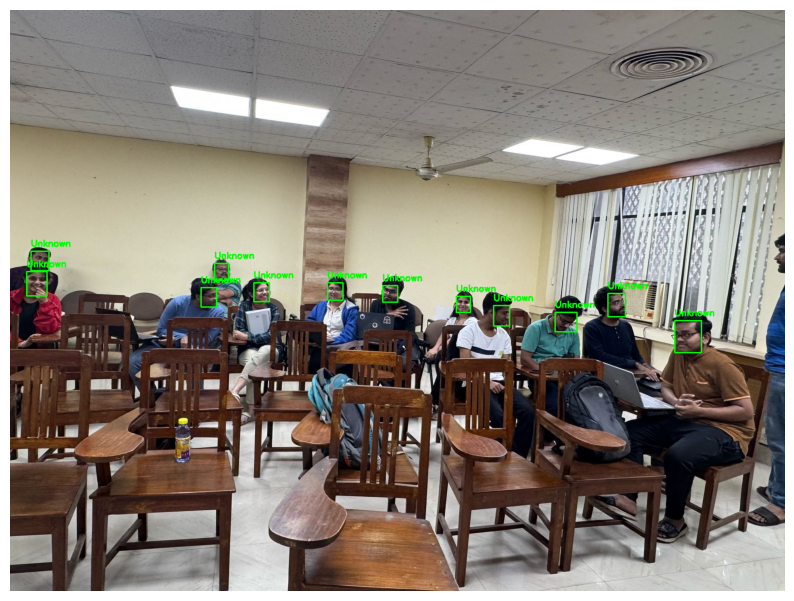

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

# Initialize the face detection & recognition model
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))  # GPU support, adjust if needed

# Load known faces from dataset
known_faces = {}  
dataset_path = "Dataset/"  # Adjust path if needed

if not os.path.exists(dataset_path):
    print("❌ Dataset folder not found!")
    exit()

# Read images from subfolders
for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)

    if not os.path.isdir(person_path) or person.startswith('.'):
        continue  

    for filename in os.listdir(person_path):
        img_path = os.path.join(person_path, filename)

        if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = app.get(img_rgb)  # Detect face

        if len(faces) > 0:
            embedding = faces[0].normed_embedding
            known_faces[person] = embedding  # Store face embedding

print(f"✅ Loaded {len(known_faces)} known faces.")

# Function to recognize a face
def recognize_face(face_embedding, known_faces, threshold=0.6):
    min_distance = float("inf")
    best_match = "Unknown"

    for name, known_embedding in known_faces.items():
        distance = np.linalg.norm(face_embedding - known_embedding)

        if distance < threshold and distance < min_distance:
            min_distance = distance
            best_match = name  # Assign best match

    return best_match

# Load classroom image
classroom_img = cv2.imread("classroom.jpg")  # Replace with actual image path
if classroom_img is None:
    print("❌ Failed to load classroom image!")
    exit()

classroom_img_rgb = cv2.cvtColor(classroom_img, cv2.COLOR_BGR2RGB)
faces = app.get(classroom_img_rgb)  # Detect faces in the classroom image

for face in faces:
    x1, y1, x2, y2 = map(int, face.bbox)  # Get bounding box
    embedding = face.normed_embedding  # Get face embedding

    # Recognize the face
    name = recognize_face(embedding, known_faces)

    # Draw bounding box & label
    cv2.rectangle(classroom_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(classroom_img, name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# FIX: Use matplotlib or save image instead of cv2.imshow()
cv2.imwrite("output.jpg", classroom_img)  # Saves the result
print("✅ Output saved as output.jpg. Open the image to view results.")

# Display using matplotlib (for Jupyter users)
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(classroom_img, cv2.COLOR_BGR2RGB))
plt.axis("off")  # Hide axes
plt.show()


In [2]:
print(f"✅ Loaded {len(known_faces)} known faces.")
for name, embedding in known_faces.items():
    print(f"🔹 {name}: {embedding[:5]}...")  # Print first 5 values of the embedding


✅ Loaded 3 known faces.
🔹 anushka: [ 0.00459659  0.00386409  0.0369833   0.0374484  -0.0213965 ]...
🔹 Prajwal Meshram: [ 0.01505012 -0.10379045  0.00980917  0.01829696  0.08008154]...
🔹 Uttam Kumar: [ 0.07796875  0.09081522 -0.0160789  -0.01072074  0.00058525]...


In [6]:
def recognize_face(face_embedding, known_faces, threshold=0.6):
    min_distance = float("inf")
    best_match = "Unknown"

    for name, known_embedding in known_faces.items():
        distance = np.linalg.norm(face_embedding - known_embedding)
        print(f"📏 Distance to {name}: {distance:.4f}")  # Debugging print

        if distance < threshold and distance < min_distance:
            min_distance = distance
            best_match = name  # Assign best match

    print(f"✅ Best match: {best_match} (distance: {min_distance:.4f})\n")
    return best_match


In [8]:
import os
import cv2
import numpy as np
from insightface.app import FaceAnalysis

# Initialize RetinaFace
app = FaceAnalysis(name="buffalo_l", providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

# ✅ Load dataset and extract face embeddings
known_faces = {}  # Dictionary to store embeddings with names
dataset_path = "Dataset/"  # Path to dataset folder

if not os.path.exists(dataset_path):
    print(f"❌ Dataset folder not found: {dataset_path}")
    exit()

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"⚠ Skipping {filename}: Unable to read image.")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = app.get(img_rgb)  # Detect face
    
    if len(faces) > 0:
        embedding = faces[0].normed_embedding  # Get face embedding
        name = os.path.splitext(filename)[0]  # Extract name from filename
        known_faces[name] = embedding  # Store in dictionary

print(f"✅ Loaded {len(known_faces)} known faces.")

# ✅ Face recognition function with threshold
def recognize_face(face_embedding, known_faces, threshold=0.7):
    min_distance = float("inf")
    best_match = "Unknown"

    for name, known_embedding in known_faces.items():
        distance = np.linalg.norm(face_embedding - known_embedding)
        
        if distance < threshold and distance < min_distance:
            min_distance = distance
            best_match = name  # Assign best match

    return best_match

# ✅ Load classroom image
classroom_img = cv2.imread("classroom.jpg")
if classroom_img is None:
    print("❌ Classroom image not found!")
    exit()

classroom_img_rgb = cv2.cvtColor(classroom_img, cv2.COLOR_BGR2RGB)
faces = app.get(classroom_img_rgb)  # Detect faces in classroom image

for face in faces:
    x1, y1, x2, y2 = map(int, face.bbox)  # Get bounding box
    embedding = face.normed_embedding  # Get face embedding

    # Recognize face
    name = recognize_face(embedding, known_faces, threshold=0.7)

    # ✅ Avoid overlapping text by adjusting position
    text_y = y1 - 10 if y1 - 10 > 10 else y1 + 20

    # ✅ Draw bounding box
    color = (0, 255, 0) if name != "Unknown" else (0, 0, 255)
    cv2.rectangle(classroom_img, (x1, y1), (x2, y2), color, 2)
    
    # ✅ Display name (avoiding overlap)
    cv2.putText(classroom_img, name, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# ✅ Save or display result
cv2.imwrite("recognized_faces.jpg", classroom_img)
print("✅ Recognition complete! Saved as recognized_faces.jpg")


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [9]:
import os
import cv2
import numpy as np
from insightface.app import FaceAnalysis

# ✅ Initialize RetinaFace
app = FaceAnalysis(name="buffalo_l", providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

# ✅ Load dataset
known_faces = {}
dataset_path = "dataset/"

if not os.path.exists(dataset_path):
    print(f"❌ Dataset folder not found: {dataset_path}")
    exit()

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    
    # ✅ Check if it's an image
    if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        print(f"⚠ Skipping non-image file: {filename}")
        continue

    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠ Skipping {filename}: Unable to read image.")
        continue  # Skip unreadable images

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = app.get(img_rgb)  # Detect face

    if len(faces) > 0:
        embedding = faces[0].normed_embedding
        name = os.path.splitext(filename)[0]
        known_faces[name] = embedding

print(f"✅ Loaded {len(known_faces)} known faces.")

# ✅ Load classroom image
classroom_img = cv2.imread("classroom.jpg")
if classroom_img is None:
    print("❌ Classroom image not found!")
    exit()

classroom_img_rgb = cv2.cvtColor(classroom_img, cv2.COLOR_BGR2RGB)
faces = app.get(classroom_img_rgb)  

# ✅ Face recognition function
def recognize_face(face_embedding, known_faces, threshold=0.7):
    min_distance = float("inf")
    best_match = "Unknown"

    for name, known_embedding in known_faces.items():
        distance = np.linalg.norm(face_embedding - known_embedding)

        if distance < threshold and distance < min_distance:
            min_distance = distance
            best_match = name  # Assign best match

    return best_match

# ✅ Detect and label faces
for face in faces:
    x1, y1, x2, y2 = map(int, face.bbox)
    embedding = face.normed_embedding
    name = recognize_face(embedding, known_faces, threshold=0.7)

    text_y = y1 - 10 if y1 - 10 > 10 else y1 + 20
    color = (0, 255, 0) if name != "Unknown" else (0, 0, 255)

    cv2.rectangle(classroom_img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(classroom_img, name, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# ✅ Save the result
cv2.imwrite("recognized_faces.jpg", classroom_img)
print("✅ Recognition complete! Saved as recognized_faces.jpg")


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [10]:
import cv2
import os

dataset_path = "dataset/"

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    img = cv2.imread(img_path)

    if img is None:
        print(f"⚠ Corrupt or unreadable: {filename}")
    else:
        print(f"✅ Readable: {filename}")


⚠ Corrupt or unreadable: anushka
⚠ Corrupt or unreadable: Prajwal Meshram
⚠ Corrupt or unreadable: Uttam Kumar


In [1]:
import cv2
import os

dataset_path = "Dataset/"  # Update this to match your folder structure

if not os.path.exists(dataset_path):
    print(f"❌ Dataset folder not found: {dataset_path}")
    exit()

for person in os.listdir(dataset_path):  # Loop through subfolders
    person_path = os.path.join(dataset_path, person)

    if not os.path.isdir(person_path):  # Skip if it's not a folder
        continue

    print(f"📂 Checking: {person}")  # Display which folder is being checked

    for filename in os.listdir(person_path):
        img_path = os.path.join(person_path, filename)

        if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Skip non-image files
            print(f"⚠ Skipping non-image file: {filename}")
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠ Corrupt or unreadable: {filename}")
        else:
            print(f"✅ Readable: {filename}")


📂 Checking: anushka
✅ Readable: anushka.jpg
📂 Checking: Prajwal Meshram
✅ Readable: Prajwal Meshram.jpg
📂 Checking: Uttam Kumar
✅ Readable: Uttam Kumar.jpg


In [2]:
import cv2
import os
import numpy as np
from insightface.app import FaceAnalysis

# Initialize RetinaFace
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

dataset_path = "Dataset/"
known_faces = {}  # Dictionary to store embeddings with names
threshold = 0.3  # Adjust the similarity threshold as needed

# Load dataset
if not os.path.exists(dataset_path):
    print(f"❌ Dataset folder not found: {dataset_path}")
    exit()

for person in os.listdir(dataset_path):  # Loop through each person folder
    person_path = os.path.join(dataset_path, person)

    if not os.path.isdir(person_path):  # Skip non-folders
        continue

    for filename in os.listdir(person_path):  # Loop through images in folder
        img_path = os.path.join(person_path, filename)

        if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Only process images
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠ Corrupt or unreadable: {filename}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = app.get(img)  # Detect face

        if len(faces) > 0:
            embedding = faces[0].normed_embedding  # Get face embedding
            known_faces[person] = embedding  # Store embedding with person's name

print(f"✅ Loaded {len(known_faces)} known faces.")

# Read the classroom image
classroom_img_path = "classroom.jpg"  # Change this to your actual image
classroom_img = cv2.imread(classroom_img_path)

if classroom_img is None:
    print("❌ Classroom image not found.")
    exit()

classroom_img_rgb = cv2.cvtColor(classroom_img, cv2.COLOR_BGR2RGB)
faces = app.get(classroom_img_rgb)  # Detect faces in the classroom image

for face in faces:
    x1, y1, x2, y2 = map(int, face.bbox)  # Get bounding box
    embedding = face.normed_embedding  # Extract embedding

    best_match = "Unknown"
    best_score = threshold  # Minimum similarity score for a match

    # Compare with known faces
    for name, known_embedding in known_faces.items():
        similarity = np.dot(embedding, known_embedding)  # Cosine similarity

        if similarity > best_score:  # If similarity is higher, update match
            best_score = similarity
            best_match = name

    # Draw bounding box
    color = (0, 255, 0) if best_match != "Unknown" else (0, 0, 255)  # Green for known, red for unknown
    cv2.rectangle(classroom_img, (x1, y1), (x2, y2), color, 2)

    # Ensure "Unknown" does not overlap with real names
    y_offset = -10 if best_match != "Unknown" else 20  # Shift unknown names down

    # Display name above the detected face
    cv2.putText(classroom_img, best_match, (x1, y1 + y_offset), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Save and display the output
output_path = "recognized_faces.jpg"
cv2.imwrite(output_path, classroom_img)
print(f"✅ Recognition complete! Saved as {output_path}")


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\70472/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.